In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Generated Pions
m = np.random.normal(139.07138, 0.00035, 10000)
m

array([139.07169681, 139.07142128, 139.07162816, ..., 139.07170215,
       139.07057066, 139.07118465])

In [3]:
#Generated Momentum 
a = np.random.exponential(10.0, 10000)
a

array([ 7.37219498,  4.82028688, 16.76488162, ...,  0.93732562,
       12.76203359, 24.91738124])

In [4]:
#Decay Angle
b = np.random.uniform(-1, 1, 10000)
np.rad2deg(b)
deg=np.rad2deg(b)

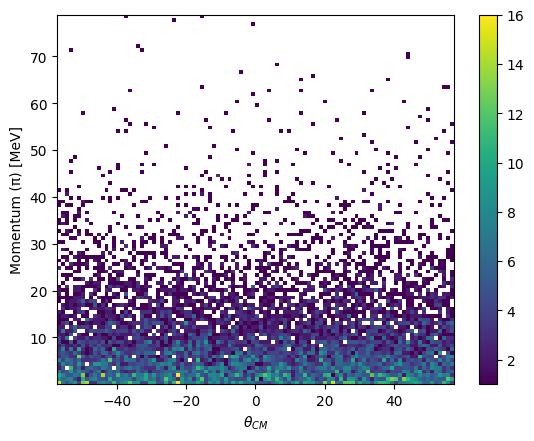

In [5]:
### P vs. angle
plt.hist2d(deg, a, bins=100, cmin=1)
#plt.xlabel('\u03B8_CM')
plt.xlabel('$\u03B8_{CM}$')
plt.ylabel('Momentum (\u03C0) [MeV]')
plt.colorbar()
#plt.legend()
plt.savefig('./PvsThetaforPions.png')

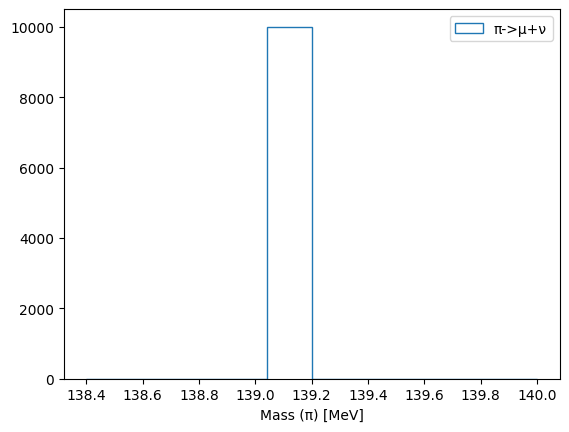

In [56]:
### 1D m
plt.hist(m, range=(138.4, 140), histtype='step', label='\u03C0->\u03BC+\u03BD')
#plt.xlim(0, 0.5)
plt.xlabel('Mass (\u03C0) [MeV]') 
plt.legend()
plt.savefig('./Momentumtheta.png')

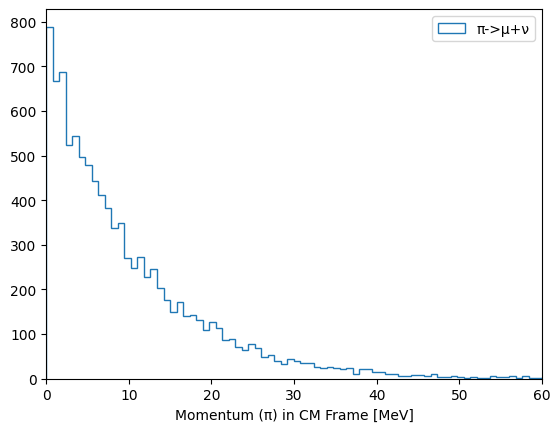

In [62]:
### 1D p
plt.hist(a, bins=100, histtype='step', label='\u03C0->\u03BC+\u03BD')
plt.xlabel('Momentum (\u03C0) in CM Frame [MeV]')
plt.xlim(0,60)
plt.legend()
plt.savefig('./MomentumpioninCM.png')


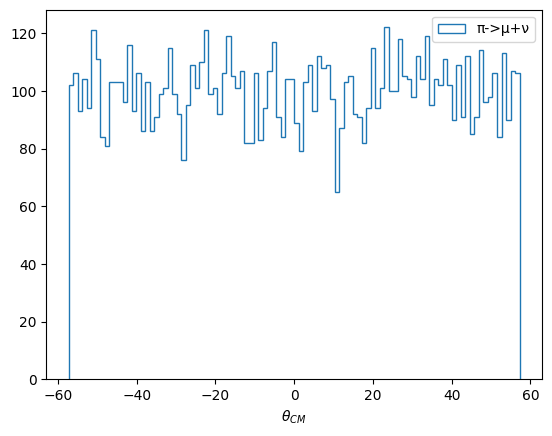

In [61]:
### 1D theta
plt.hist(deg, bins=100, histtype='step', label='\u03C0->\u03BC+\u03BD')
plt.xlabel('$\u03B8_{CM}$')
plt.legend()
plt.savefig('./thetaCM.png')

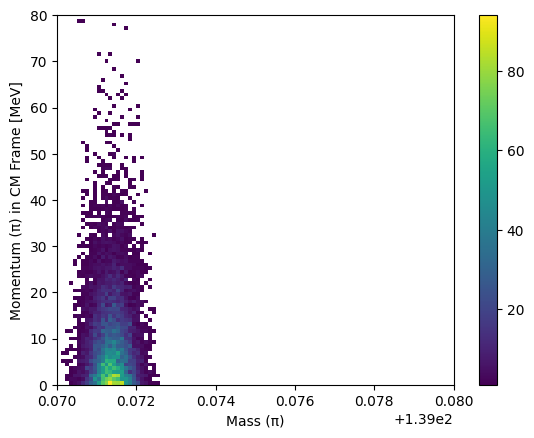

In [60]:
#P vs M
plt.hist2d(m,a, bins=100, cmin=1, range=[[139.07,139.08],[0,80]])
plt.xlabel('Mass (\u03C0)')
plt.ylabel('Momentum (\u03C0) in CM Frame [MeV]')
plt.colorbar()
plt.savefig('./MomvsMassinCM2D.png')

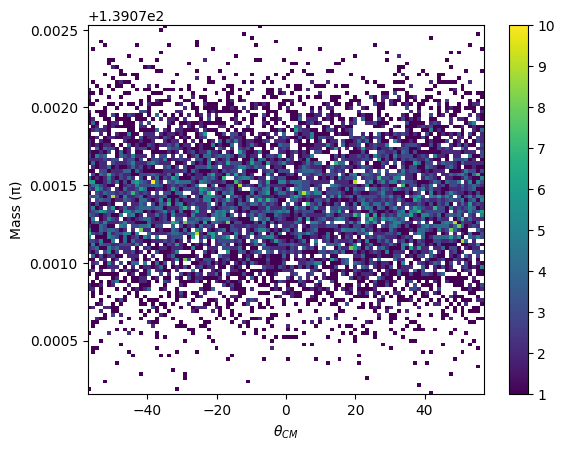

In [63]:
#M vs Decay Angle
plt.hist2d(deg,m, bins=100, cmin=1)
plt.xlabel('$\u03B8_{CM}$')
plt.ylabel('Mass (\u03C0)')
plt.colorbar()
plt.savefig('./MassvsthetaCM2D.png')

In [11]:
#Generated Muons
mb=np.random.normal(105.6583755,0.0000023,10000)
mb

array([105.65837641, 105.65837164, 105.6583718 , ..., 105.65837634,
       105.65837691, 105.65837894])

In [12]:
import numpy as np

def CM_momentum(ma,mb):
    p = ((ma*ma) - (mb*mb))/(2*(ma))
    return p

def Energy_of_B(mB,pB):
    EB=np.sqrt((mB*mB)+(pB*pB))
    return EB



def lab_mom_perpendi(pB,angle):
    P_perpendi=pB* np.sin(angle)
    return P_perpendi

def energy_lab(EB,pB,angle):
    EB_lab=((gamma*EB)+(np.cos(angle)*pB*beta*gamma))
    return EB_lab

def Plab_mag(p1,p2):
    P_mag=np.sqrt((p1*p1)+(p2*p2))
    return P_mag

def decay_angle_lab(P3,P4):
    Angle_lab=np.arccos(P3/P4)
    return Angle_lab

In [13]:
cm_p = CM_momentum(m,mb)
cm_p

array([29.39938369, 29.39917002, 29.39933304, ..., 29.39938794,
       29.39849522, 29.39897787])

In [14]:
eb = Energy_of_B(mb,cm_p)
eb

array([109.67231312, 109.67225126, 109.67229511, ..., 109.6723142 ,
       109.67207544, 109.67220678])

In [15]:
beta = 0.2
gamma = 1./np.sqrt(1-beta**2)

In [16]:
def lab_mom_parallel(gamma,pB,angle,beta,EB):
    P_parallel=(gamma*pB*np.cos(angle))+(EB*beta*gamma)
    return P_parallel

parallel = lab_mom_parallel(gamma,cm_p, b,beta, eb)

In [17]:
parallel

array([50.15943869, 52.26289765, 51.03649897, ..., 47.37399128,
       44.43750394, 52.18730077])

In [18]:
perpendi = lab_mom_perpendi(cm_p, b)
perpendi

array([ 11.12903092,   2.72591785,  -8.73760461, ..., -16.27688878,
        19.93699763,   3.42778751])

In [19]:
eblab=energy_lab(eb, cm_p, b)
eblab

array([117.48837016, 117.90900134, 117.66376457, ..., 116.93128174,
       116.34375034, 117.89383838])

In [20]:
mag = Plab_mag(parallel, perpendi)
mag

array([51.37922362, 52.33393831, 51.77904945, ..., 50.0922365 ,
       48.70498569, 52.29975228])

In [21]:
lab_angle = decay_angle_lab(parallel, mag)
lab_angle

array([0.21833624, 0.05211058, 0.16955919, ..., 0.33094654, 0.42173279,
       0.0655882 ])

In [22]:
np.rad2deg(lab_angle) 
an=np.rad2deg(lab_angle)
an

array([12.50974523,  2.98571638,  9.7150259 , ..., 18.96184011,
       24.16350875,  3.75792677])

In [23]:
perpendi.flatten()

array([ 11.12903092,   2.72591785,  -8.73760461, ..., -16.27688878,
        19.93699763,   3.42778751])

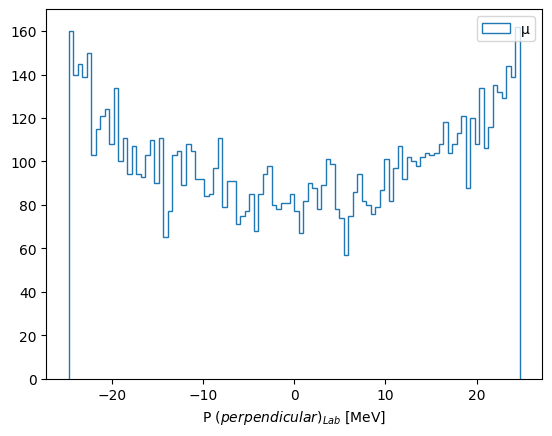

In [64]:
plt.hist(perpendi.flatten(), histtype='step', bins=100, label='\u03BC')
plt.legend()
plt.xlabel('P $(perpendicular)_{Lab}$ [MeV]')
plt.savefig('./P_parallellab.png')


In [25]:
parallel.flatten()

array([50.15943869, 52.26289765, 51.03649897, ..., 47.37399128,
       44.43750394, 52.18730077])

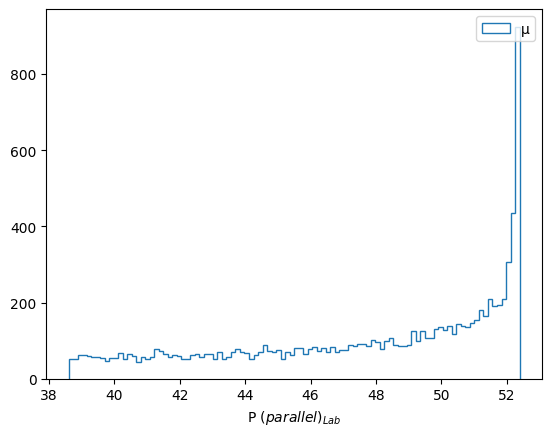

In [65]:
plt.hist(parallel.flatten(), histtype='step', bins=100, label='\u03BC' )
plt.xlabel('P $ (parallel)_{Lab} $')
plt.legend()
plt.savefig('./P_perpendilab.png')

In [27]:
eblab.flatten()

array([117.48837016, 117.90900134, 117.66376457, ..., 116.93128174,
       116.34375034, 117.89383838])

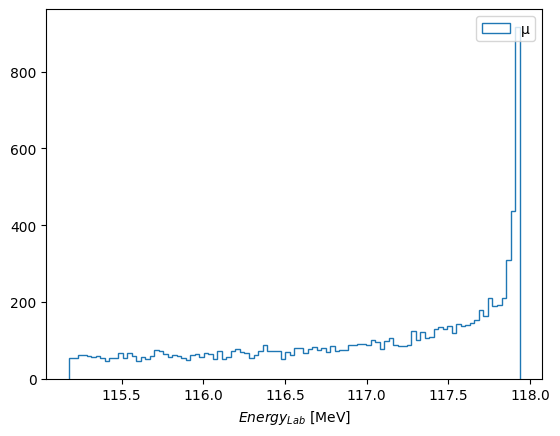

In [66]:
plt.hist(eblab.flatten(), histtype='step', bins=100,label='\u03BC' )
plt.xlabel('$Energy_{Lab}$ [MeV]')
plt.legend()
plt.savefig('./Elab.png')

In [29]:
an.flatten()

array([12.50974523,  2.98571638,  9.7150259 , ..., 18.96184011,
       24.16350875,  3.75792677])

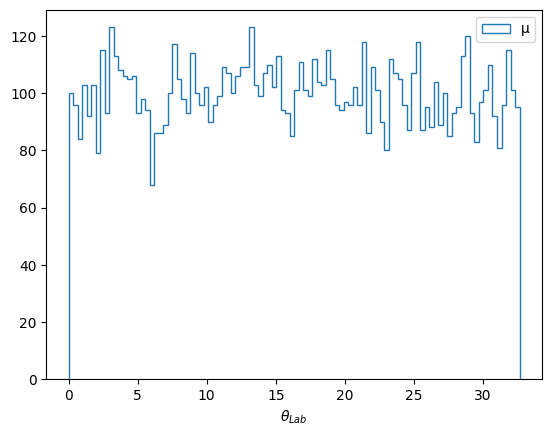

In [67]:
plt.hist(an.flatten(), bins=100, histtype='step', label='\u03BC')
plt.xlabel('$\u03B8_{Lab}$')
plt.legend()
plt.savefig('./theta_lab.png')

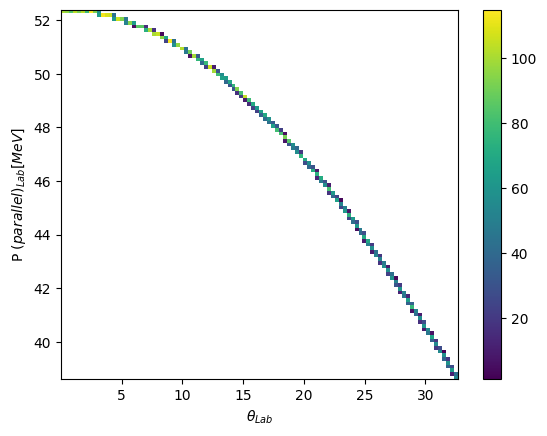

In [71]:
plt.hist2d(an.flatten(), parallel.flatten(), bins=100, cmin=1, label='\u03BC')
plt.colorbar()
plt.xlabel('$\u03B8_{Lab}$')
plt.ylabel('P $ (parallel)_{Lab}[MeV] $')
plt.savefig('./P_labvstheta.png')

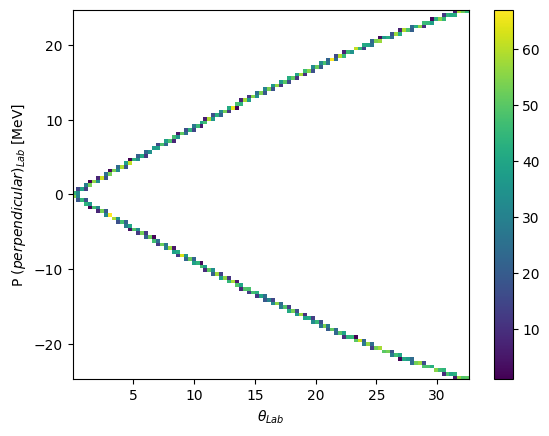

In [69]:
plt.hist2d(an.flatten(),perpendi.flatten(),bins=100,cmin=1 )
plt.colorbar()
plt.xlabel('$\u03B8_{Lab}$')
plt.ylabel('P $(perpendicular)_{Lab}$ [MeV]')
plt.savefig('./P_perpendivsthetalab.png')




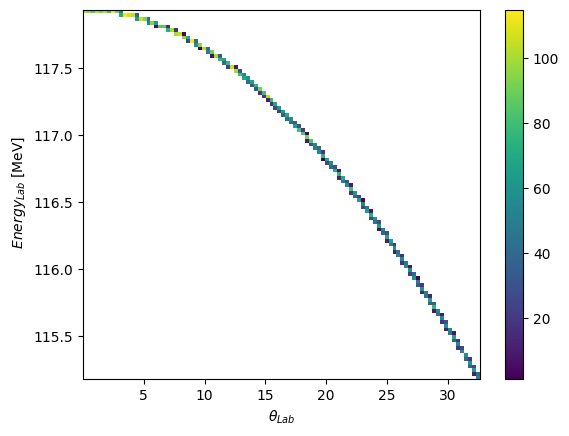

In [70]:
plt.hist2d(an.flatten(),eblab.flatten(), bins=100, cmin=1)
plt.colorbar()
plt.xlabel('$\u03B8_{Lab}$')
plt.ylabel(' $Energy_{Lab}$ [MeV]')
plt.savefig('./Elabvstheta.png')

In [34]:
def neu_mom_lab(gamma,en,beta,theta_CM):
    P_c_par= (gamma*en*np.cos(theta_CM))+(beta*gamma*en)
    return P_c_par


def neu_mom_perpendi(en, theta_CM):
    P_c_perpendi=(en*np.sin(theta_CM))
    return P_c_perpendi



In [35]:
 pc_par = neu_mom_lab(gamma, cm_p, beta, deg)
 pc_par   
    


array([-23.05286526,  23.13530302,   6.33108182, ..., -11.69749219,
        14.54714116,  33.48978683])

In [36]:
pc_perpendi=neu_mom_perpendi(cm_p, deg)
pc_perpendi


array([ -7.34539565, -24.13447489,  29.39755533, ..., -23.74052664,
       -28.18076495,  11.7853303 ])

In [37]:
def energy_c(gamma,pc,beta,theta_CM):
    ec= (gamma*pc)+ (beta*gamma*pc*np.cos(theta_CM))
    return ec

In [38]:
energy_c(gamma, cm_p, beta, deg)
Ec=energy_c(gamma, cm_p, beta, deg)
Ec

array([24.19482247, 33.43224677, 30.07156226, ..., 26.46590125,
       31.71395323, 35.50295526])

In [39]:
def Pclab_mag(p1,p2):
    Pc_mag=np.sqrt((p1*p1)+(p2*p2))
    return Pc_mag

In [40]:
Pclab_mag(pc_par, pc_perpendi)
Pcmagni=Pclab_mag(pc_par, pc_perpendi)
Pcmagni

array([24.19482247, 33.43224677, 30.07156226, ..., 26.46590125,
       31.71395323, 35.50295526])

In [41]:
def decay_angle_lab(P3,P4):
    Angle_lab=np.arccos(P3/P4)
    return Angle_lab

In [42]:
decay_angle_lab(pc_par, Pcmagni)
lab_angle_C=decay_angle_lab(pc_par, Pcmagni)
lab_angle_C

array([2.83313054, 0.80653266, 1.35867531, ..., 2.02860502, 1.09426642,
       0.33837375])

In [43]:
np.rad2deg(lab_angle_C) 
ang=np.rad2deg(lab_angle_C)
ang

array([162.32642253,  46.21091762,  77.84636087, ..., 116.23050615,
        62.69684736,  19.38738803])

In [44]:
ang.flatten()

array([162.32642253,  46.21091762,  77.84636087, ..., 116.23050615,
        62.69684736,  19.38738803])

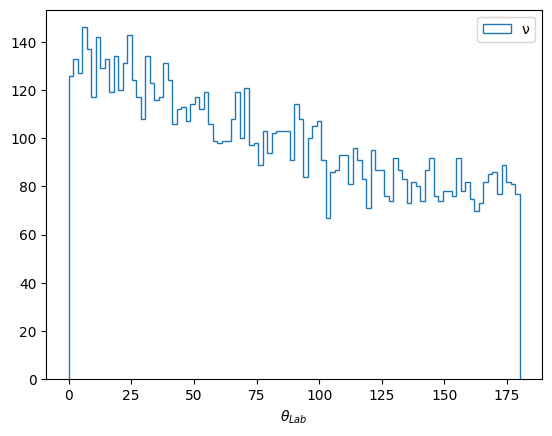

In [82]:
plt.hist(ang.flatten(), bins=100, histtype='step', label='\u03BD')
plt.xlabel('$\u03B8_{Lab}$')
plt.legend()
plt.savefig('./decayangle_lab_neutrino.png')

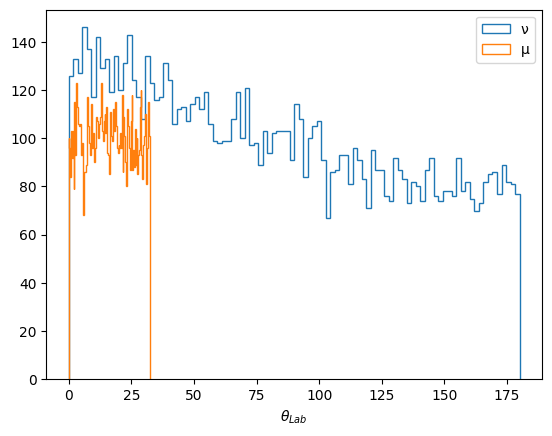

In [46]:
plt.hist(ang.flatten(), bins=100, histtype='step', label='\u03BD')
plt.hist(an.flatten(), bins=100, histtype='step', label='\u03BC')
plt.xlabel('$\u03B8_{Lab}$')
plt.legend()


In [47]:
pc_par.flatten()

array([-23.05286526,  23.13530302,   6.33108182, ..., -11.69749219,
        14.54714116,  33.48978683])

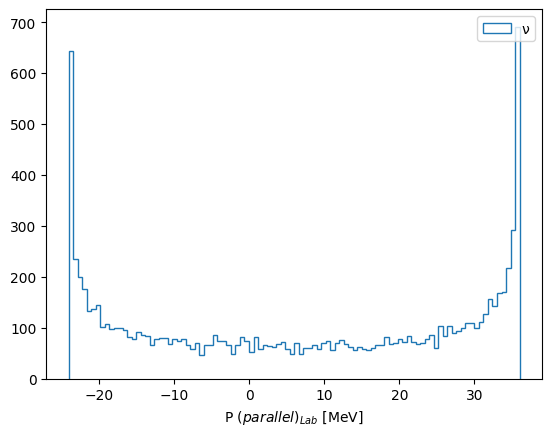

In [75]:
plt.hist(pc_par.flatten(), bins=100, histtype='step', label='\u03BD')
plt.legend()
plt.xlabel('P $(parallel)_{Lab}$ [MeV]')
plt.savefig('./P_1_lab_neutrino.png')

In [49]:
pc_perpendi.flatten()

array([ -7.34539565, -24.13447489,  29.39755533, ..., -23.74052664,
       -28.18076495,  11.7853303 ])

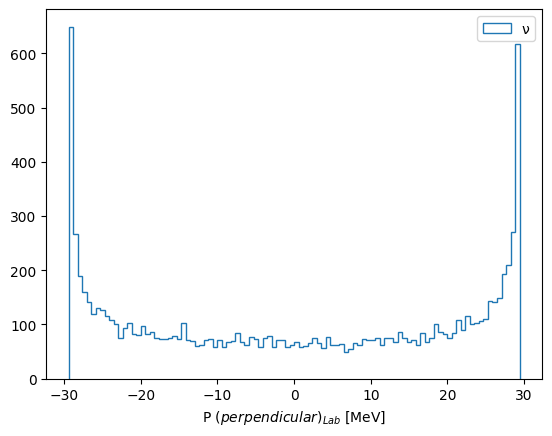

In [74]:
plt.hist(pc_perpendi.flatten(), bins=100,  histtype='step', label='\u03BD')
plt.legend()
plt.xlabel('P $(perpendicular)_{Lab}$ [MeV]') 
plt.savefig('./P_2_neutrino_lab.png')

In [51]:
Ec.flatten()

array([24.19482247, 33.43224677, 30.07156226, ..., 26.46590125,
       31.71395323, 35.50295526])

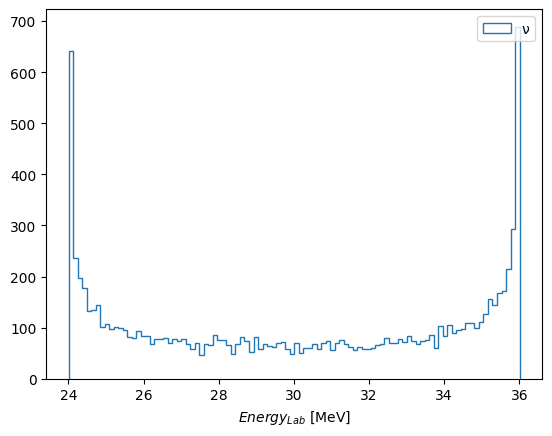

In [76]:
plt.hist(Ec.flatten(), histtype='step', bins=100,label='\u03BD' )
plt.xlabel('$Energy_{Lab}$ [MeV]')
plt.legend()
plt.savefig('./E_lab_neutrino.png')

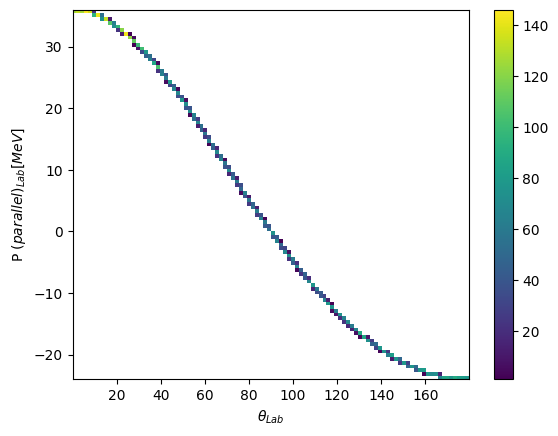

In [83]:
plt.hist2d(ang.flatten(),pc_par.flatten(), bins=100, cmin=1)
plt.colorbar()
plt.xlabel('$\u03B8_{Lab}$')
plt.ylabel('P $ (parallel)_{Lab}[MeV] $')
plt.savefig('./P_1vstheta_lab_neu.png')

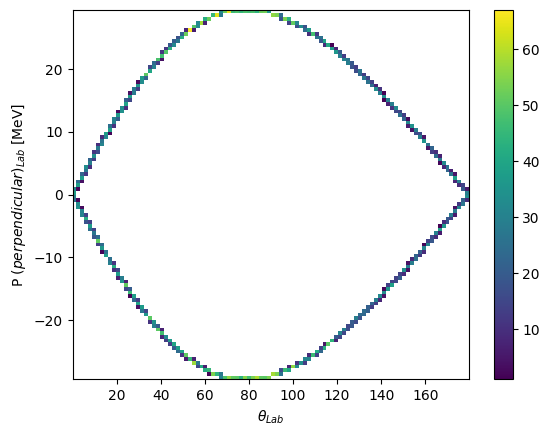

In [79]:
plt.hist2d(ang.flatten(),pc_perpendi.flatten(), bins=100, cmin=1)
plt.colorbar()
plt.xlabel('$\u03B8_{Lab}$')
plt.ylabel('P $(perpendicular)_{Lab}$ [MeV]')
plt.savefig('./P_perpendivstheta_neutrino.png')


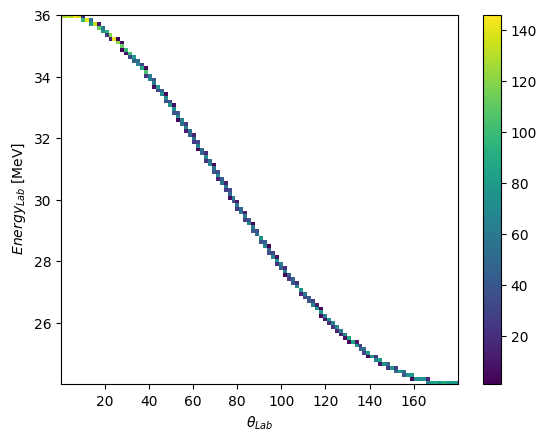

In [81]:
plt.hist2d(ang.flatten(), Ec.flatten(), bins=100, cmin=1)
plt.colorbar()
plt.xlabel('$\u03B8_{Lab}$')
plt.ylabel(' $Energy_{Lab}$ [MeV]')
plt.savefig('./Energy_labvstheta_neutrino.png')